#  Kaggle Competition 
### Lourenço Ferreira - Data Mining I

### Importar principais bibliotecas utilizadas:

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

###  Importar o Dataset de treino

In [2]:
df = pd.read_csv(r'C:\Users\loure\Google Drive\Faculdade\Mestrado - MADSAD\Data Mining I\Kaggle Competition\training.csv',)

# Tratar os missing values de ? para NA:

df = df.replace({ "?": np.nan} )

#### Printar primeiras linhas do Dataframe:

In [3]:
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x52,x53,x54,x55,y
0,1,5,5,5,0,0,0,0,0,0,...,0,0,0,0,0,56,-3,14,6,no
1,2,5,5,5,0,0,0,0,0,0,...,0,0,0,0,0,64,-2,16,6,no
2,3,4,4,4,0,0,0,0,0,0,...,0,0,0,0,0,56,-3,15,6,no
3,4,4,4,4,0,0,0,0,0,0,...,0,0,0,0,0,58,-3,13,6,no
4,5,5,5,5,0,0,0,0,0,0,...,0,0,0,0,0,57,-2,15,6,no


###  Principais Características do Dataset

####  N º de linhas e Nº de colunas

In [4]:
df.shape 

(2346, 54)

 #### Analisar tipos de dados das colunas (with .info()) :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2346 non-null   int64 
 1   x1      2346 non-null   int64 
 2   x2      2064 non-null   object
 3   x3      1907 non-null   object
 4   x4      2330 non-null   object
 5   x5      2056 non-null   object
 6   x6      1902 non-null   object
 7   x7      2330 non-null   object
 8   x8      2056 non-null   object
 9   x9      1902 non-null   object
 10  x10     2344 non-null   object
 11  x11     2063 non-null   object
 12  x12     1906 non-null   object
 13  x13     2273 non-null   object
 14  x14     2005 non-null   object
 15  x15     1865 non-null   object
 16  x16     2344 non-null   object
 17  x17     2064 non-null   object
 18  x18     1907 non-null   object
 19  x19     1312 non-null   object
 20  x20     1202 non-null   object
 21  x21     1136 non-null   object
 22  x22     1772 non-null   

#### Algumas colunas foram incorretamente identificadas como objetos, pelo que podemos convert para float:

In [6]:
# Data type conversions

for col in df.select_dtypes(np.object):
    try:
        df[col] = df[col].astype('float32')
    except:
        print()
    # dá erro na ultima iteração por ser a coluna da classe.

#### Estatisticas descritivas sobre as Colunas numéricas

In [7]:
df.describe() # This function shows you some basic descriptive statistics for all numeric columns

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x43,x44,x45,x46,x47,x48,x52,x53,x54,x55
count,2346.000000,2346.000000,2064.000000,1907.000000,2330.000000,2056.000000,1902.000000,2330.000000,2056.000000,1902.000000,...,2346.000000,2064.000000,1907.000000,2346.000000,2064.000000,1907.000000,2346.000000,2284.000000,2346.000000,2346.000000
mean,1173.500000,4.170503,4.200097,4.205034,0.007296,0.010214,0.005258,0.012446,0.011673,0.009464,...,0.008099,0.009205,0.007341,0.008951,0.011628,0.010488,62.527280,-4.621716,14.557545,14.687980
std,677.376188,1.001449,0.959772,0.973097,0.158996,0.261744,0.144959,0.229467,0.218067,0.219791,...,0.114691,0.129925,0.116564,0.236185,0.208546,0.209667,17.860783,1.115557,1.359282,4.511894
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,-7.000000,4.000000,6.000000
25%,587.250000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,-5.000000,14.000000,11.000000
50%,1173.500000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,-4.000000,15.000000,15.000000
75%,1759.750000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,-4.000000,15.000000,19.000000
max,2346.000000,5.000000,5.000000,5.000000,7.000000,10.000000,6.000000,10.000000,9.000000,9.000000,...,3.000000,3.000000,3.000000,10.000000,8.000000,8.000000,99.000000,-2.000000,16.000000,25.000000


In [8]:
#.describe() only analyzes numeric columns by default, but you can provide other data types if you use the include parameter:
df.describe(include=np.object)

,y
count,2346
unique,2
top,no
freq,2189


In [9]:
# Podemos ajustar a precisão de casas decimais! Não precisamos de ter tantas:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### Contagem Absoluta por Classe dos records

In [10]:
df["y"].value_counts()

no     2189
yes     157
Name: y, dtype: int64

#### Contagem Relativa por Classe dos records

In [11]:
df["y"].value_counts() / len(df)*100 

no    93.31
yes    6.69
Name: y, dtype: float64

###  Analisar Missing Values

#### Frequência Absoluta de NA's por coluna


In [12]:
NA_Analysis = df.isna().sum()
NA_Analysis.sort_values(ascending=False).head(10) # Mostrar as 10 colunas com mais NA's

x21    1210
x20    1144
x19    1034
x27    1019
x26     905
x24     860
x25     752
x23     749
x36     646
x33     628
dtype: int64

#### Frequência Relativa de NA's por coluna


In [13]:
NA_Analysis = df.isnull().sum()/len(df)*100
NA_Analysis.sort_values(ascending=False).head(10) # Mostrar as 10 colunas com mais NA's

x21   51.58
x20   48.76
x19   44.08
x27   43.44
x26   38.58
x24   36.66
x25   32.05
x23   31.93
x36   27.54
x33   26.77
dtype: float64

### Analisar Correlação entre Atributos

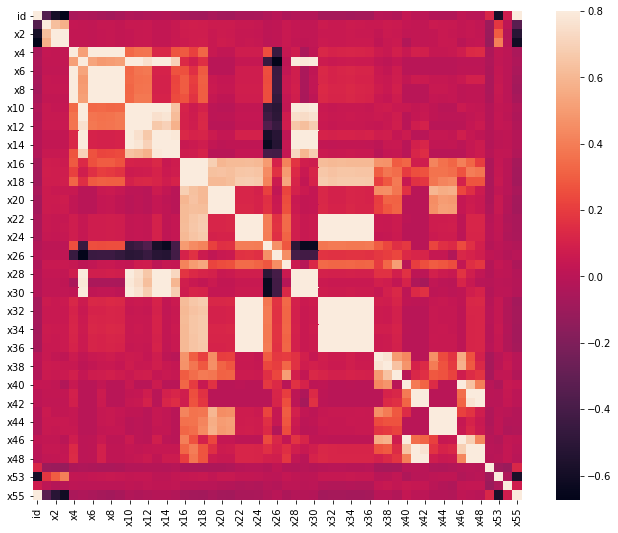

In [43]:
import seaborn as sns

# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()


### Histograma dos atributos do modelo

In [15]:
#fig = plt.figure(figsize = (8,8))
##ax = fig.gca()
#for c in df[1:2]:
#    if c != 'id':
#        try:
#            print('Histograma para o atributo '+ c + ' :')
#            df.hist(column = c, by = 'y',sharex=True, zorder=2, rwidth=0.9)
#            plt.show()
#        except:
#            print()
    


## Separar o Dataset entre atributos e classe

In [16]:
X = df.drop(['id', 'y'], axis=1) # Features - todas menos o ID e a classe
y = df.y # Target variable


## Split Train Dataset

Train Test Split is one of the important steps in Machine Learning. It is very important because your model needs to be evaluated before being deployed. 

The main idea behind the train test split is to convert original data set into 2 parts:
train
test
where train consists of training data and training labels and test consists of testing data and testing labels.

The easiest way to do it is by using scikit-learn, which has a built-in function train_test_split. Let’s code it!

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Treino de Algoritmos sem Pré-Processamento

 ## 1 - Decision Tree

Nota: Apesar de o objectivo neste momento ser treinar os algoritmos sem pré-processamento dos dados, este algoritmo não é compatível com NA's, pelo que é necessário tratarmos os valores em falta primeiro, pelo que podemos seguir multiplas abordagens:
 
    (Para já vamos apenas substituir por 0 os NA's)

In [18]:
# Vamos primeiro gerar um novo dataframe que vai ser usado e manipulado para o algoritmo Decision Trees
DT_df = df

DT_df.dropna(axis  = 0)               #Apagar as linhas com NA's
DT_df.dropna(axis  = 1)               #Apagar as colunas com NA's
DT_df.fillna(value = 0, inplace = True)               #Substituir os missing values por um valor fixo (0 neste caso)
DT_df.fillna(axis=0, method='ffill')  #Substituir os NA's pelo valor da linha acima.

#Substituir os missing values pela média
    
#for c in DT_df:
#    df[c].fillna(value=df[c].mean(), inplace=True)



,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x52,x53,x54,x55,y
0,1,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,56,-3.00,14,6,no
1,2,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,64,-2.00,16,6,no
2,3,4,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,56,-3.00,15,6,no
3,4,4,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,58,-3.00,13,6,no
4,5,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,57,-2.00,15,6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,2342,5,5.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,64,-4.00,14,25,no
2342,2343,2,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,22,-5.00,15,25,no
2343,2344,2,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,78,-5.00,13,25,no
2344,2345,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,53,0.00,14,25,no


#### Vamos então partir o Dataset de treino:

In [19]:
DT_X = DT_df.drop(['id', 'y'], axis=1) # Features - todas menos o ID e a classe
DT_y = DT_df.y # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(DT_X, DT_y, test_size=0.2, random_state=1) # 80% training and 20% test

#### Treinar o algoritmo:

In [20]:

 # Create Decision Tree classifer object
 clf = DecisionTreeClassifier(criterion="entropy")

 # Train Decision Tree Classifer
 clf = clf.fit(X_train,y_train)

#### Gerar previsões para o dataset de test

In [21]:
y_pred = clf.predict(X_test)

### Representação Gráfica da Decision Tree:

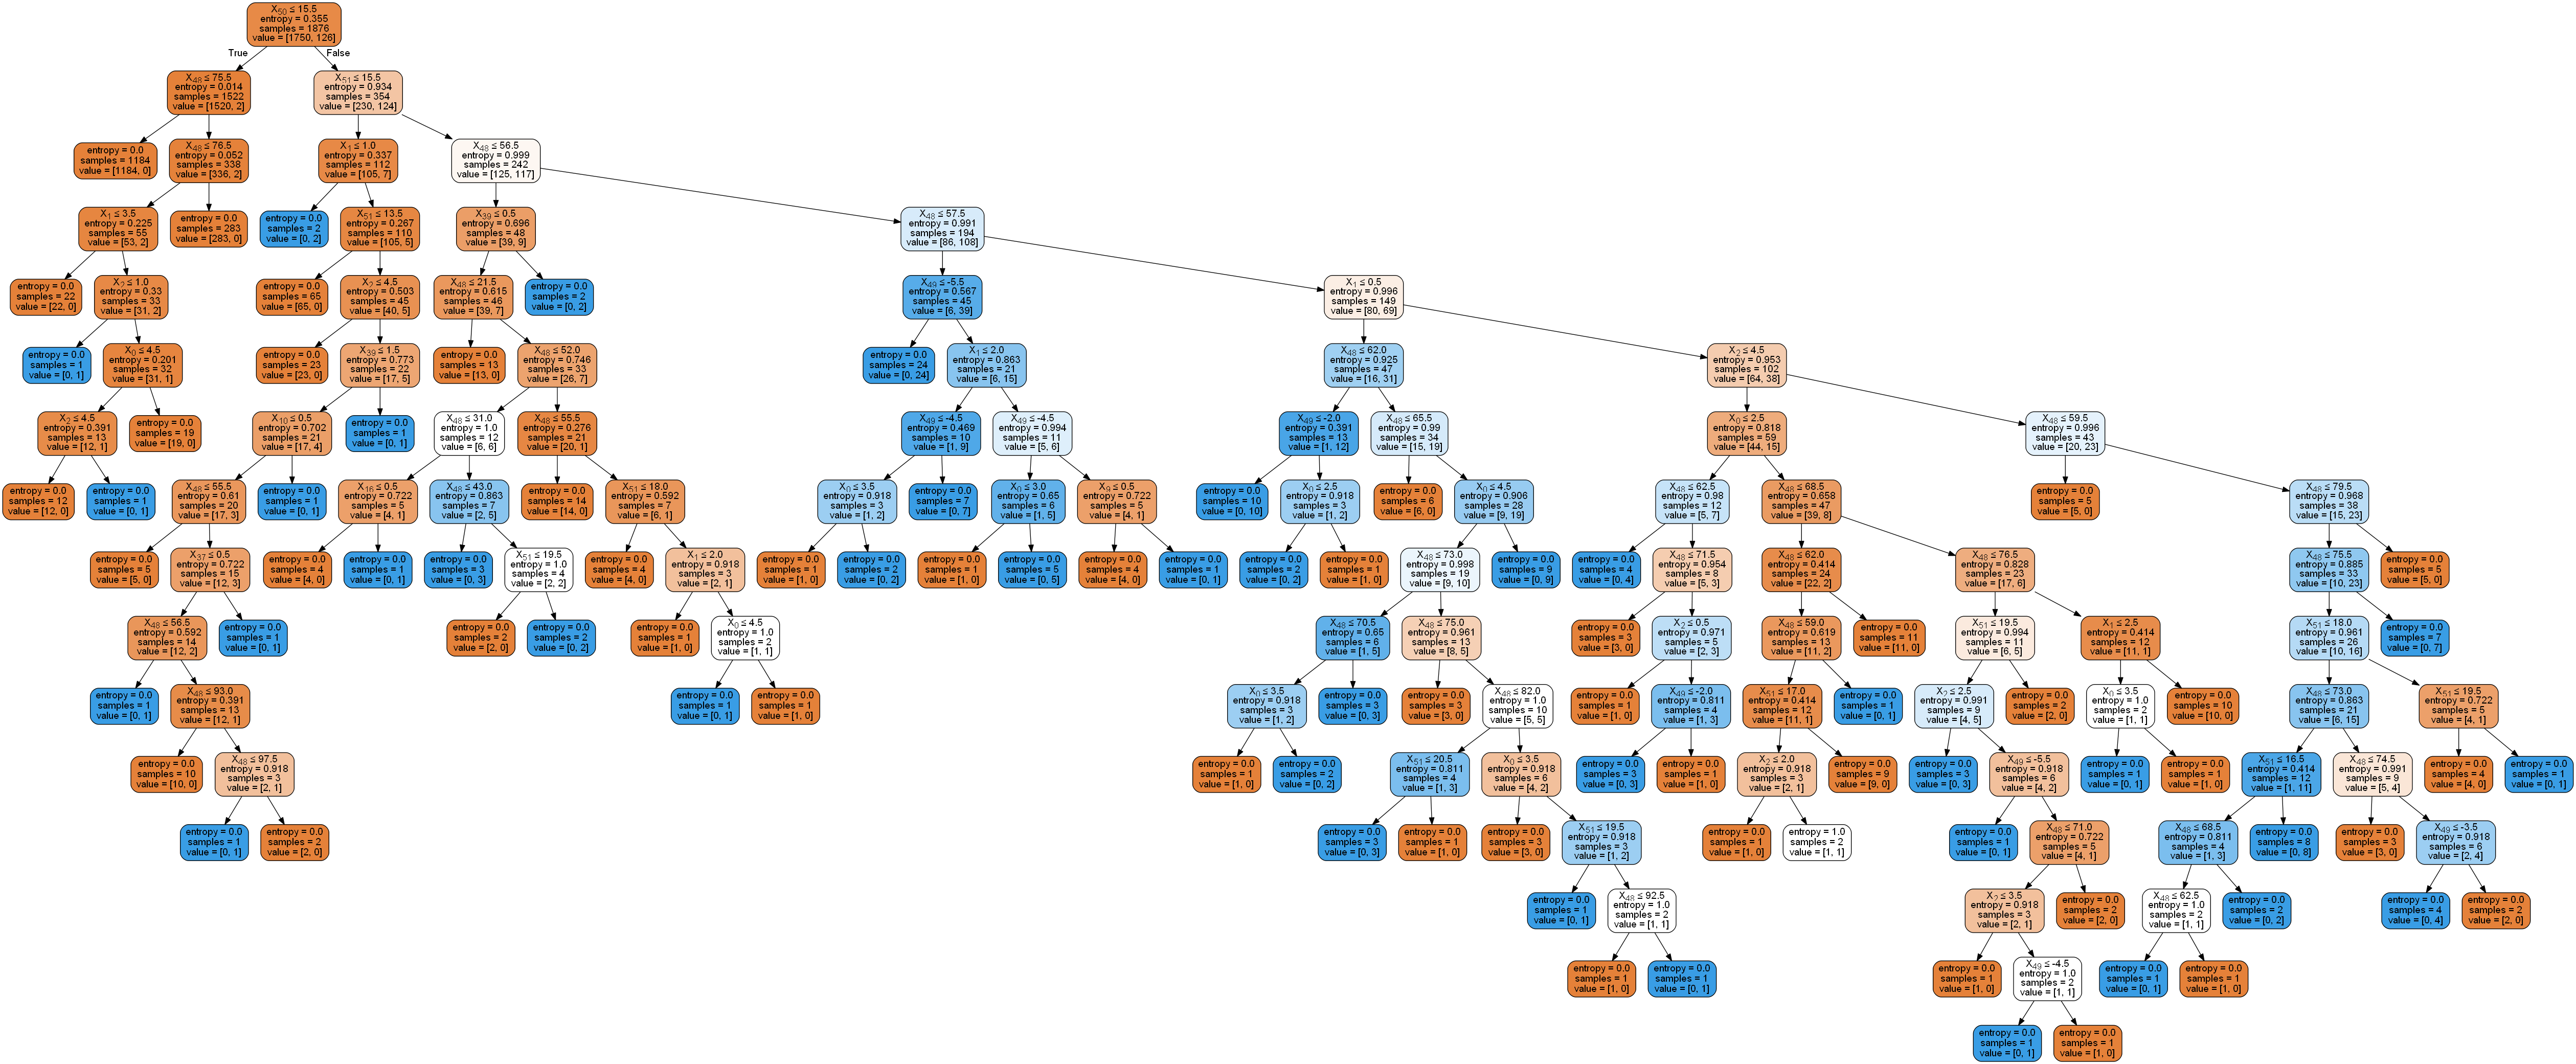

In [22]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Avaliar a precisão do algoritmo face aos verdadeiros valores para a classe do dataset de teste:

In [23]:
 print("Precisão do Algoritmo:",metrics.accuracy_score(y_test, y_pred).round(4)*100, "%")

Precisão do Algoritmo: 94.67999999999999 %


Sabemos então que o nosso algoritmo acertou em cerca de 94% das classes do dataset de treino!

#### Nota:
O nosso dataset foi partido apenas uma vez e treinado apenas uma vez, pelo que esta valor de precisão vai variar de execução para execução e não nos dá muito segurança relativamente à precisão do algoritmo. Uma forma mais fiável e segura de avaliar a precisão do algoritmo é através de Cross Validation!

#### Cross Validation (K = 10) : 

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(clf, DT_X, DT_y, scoring='accuracy', cv=cv, n_jobs=-1)

# Lista com os 10 testes de precisão.
print(scores)

[0.94893617 0.94468085 0.96595745 0.96170213 0.95319149 0.96595745
 0.95726496 0.95726496 0.97008547 0.98290598]


In [25]:
 print("Precisão Média do Algoritmo com 10 Fold Cross Validation:", scores.mean().round(3) * 100, "%")

Precisão Média do Algoritmo com 10 Fold Cross Validation: 96.1 %


A estimativa do desempenho do algoritmo avaliado por k-fold Cross Validations pode ter ruído.

Cada vez que o procedimento é executado, vamos ter uma divisão diferente do conjunto de dados em k-folds pode ser implementada e a distribuição das pontuações de desempenho pode ser diferente, resultando numa estimativa média diferente de desempenho do modelo.

Uma solução para reduzir o ruído no desempenho estimado do modelo é aumentar o valor de folds (k). Isso vai reduzir o bias no desempenho estimado do modelo, embora aumente a variância (mais propenso a overfitting).

Uma abordagem alternativa e preferível para evitar o overfitting, é repetir o processo de validação cruzada k-fold várias vezes e calcular o desempenho médio em todas as repetições e folds:

### Repeated 10-Fold Cross-Validation


In [26]:
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# evaluate model
scores = cross_val_score(clf, DT_X, DT_y, scoring='accuracy', cv=cv, n_jobs=-1)
#print(scores)
print("Precisão Média do Algoritmo com 10 repetições do 10 Fold Cross Validation:", scores.mean().round(3) * 100, "%")

Precisão Média do Algoritmo com 10 repetições do 10 Fold Cross Validation: 95.8 %


 Desta forma podemos ter mais segurança relativamente à performance do nosso algoritmo!

Apesar de termos um valor bastante alto para a precisão do nosso algoritmo, visto que estamos perante um problema de classificação não temos realmente garantias que o nosso algoritmo seja um bom classificador principalmente quando uma grande parte do dataset de teste é todo da mesma classe!

Quote: "Remember, accuracy is a very useful metric when all the classes are equally important. But this might not be the case if we are predicting if a patient has cancer."

Uma forma muito mais fiável de analisar a performance do nosso classificador é através de uma Confusion Matrix!



### Confusion Matrix

In [27]:
from sklearn.model_selection import cross_val_predict

#y_pred = cross_val_predict(clf, DT_X, DT_y, cv=3)
y_pred = clf.predict(X_test)

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[426  13]
 [ 12  19]]
              precision    recall  f1-score   support

          no       0.97      0.97      0.97       439
         yes       0.59      0.61      0.60        31

    accuracy                           0.95       470
   macro avg       0.78      0.79      0.79       470
weighted avg       0.95      0.95      0.95       470



Visualização mais complexa da Confusion Matrix:

Confusion matrix, without normalization
[[426  13]
 [ 12  19]]
Normalized confusion matrix
[[0.97038724 0.02961276]
 [0.38709677 0.61290323]]


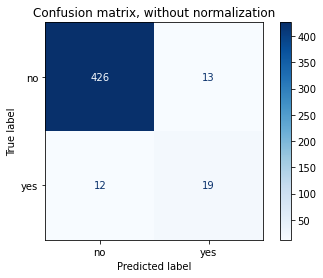

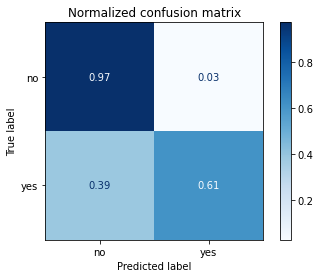

In [28]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["no","yes"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Precision & Recall

Podemos ainda calcular a Precision (De todos os positivos que eu estimei quantos é que são realmente positivos - True Positives):

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, pos_label='yes').round(4)*100 # Nota é preciso indicar qual é a classe positiva

59.38

E calcular o Recall  ( também chamado de Sensitivity )
(De todos os reais positivos quantos é que eu estimei que são positivos): 

In [30]:
recall_score(y_test, y_pred, pos_label='yes').round(4)*100  # Nota é preciso indicar qual é a classe positiva

61.29

Relembrar se necessário:
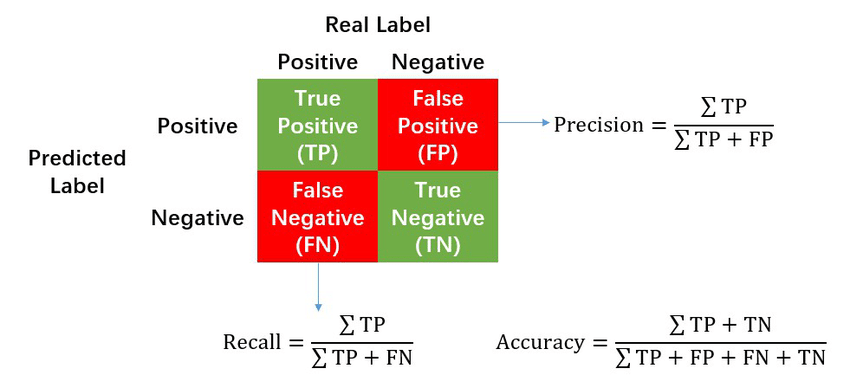

Podemos então utilizar a Precision ou Recall para o nosso problema de Classificação!

Nota: Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus.
Recall: Appropriate when minimizing false negatives is the focus.
Sometimes, we want excellent predictions of the positive class. We want high precision and high recall.

Se queremos maximizar ambas as métricas, podemos utilizar uma nova métrica que combina a Precision e o Recall no seu cálculo - F-score.


### F-Score - Média harmônica entre a Precision e Recall

In [31]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, pos_label = 'yes')
print('F-Score: %.3f' % score)

F-Score: 0.603


Conclusão: Apesar de inicialmente termos uma accuracy de 94% que parecia aparentemente muito bom, o nosso algoritmo apenas consegiu atingir um F-score de 56,2% ! ( F score varia entre 0 e 100% )

### ROC (Receiver Operator Characteristic)  and AUC (area under the curve)

Uma curva ROC mostra o “True Positive Rate vs. False Positive Rate” para diferentes níveis de Threshold.

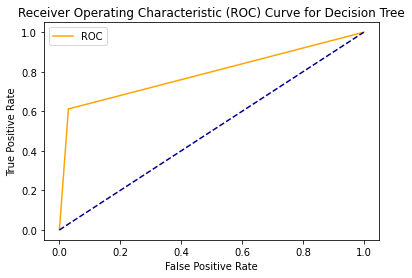

AUC Score: 0.79


In [32]:

#Estimar probabilidades para o dataset test com base no algoritmo treinado.
probs = clf.predict_proba(X_test)

#Keep probabilities of the positive class only.
probs = probs[:, 1]

# Python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 'yes')
plot_roc_curve(fpr, tpr)

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

 AUC (“area under the ROC curve”)  é uma forma de resumir a curva ROC num único valor, calculando a “área debaixo da curva”!
 Quanto mais alto for o AUC melhor é o algoritmo a prever 0s como 0s e 1s e 1s.
 Por exemplo, quanto mais alto for o AUC, melhor será o modelo capaz de classificar entre pacientes com/doença.


## K-Nearest Neighbor (KNN) 



In [33]:
from sklearn.neighbors import KNeighborsClassifier

KNN_df = df # Criar nova dataframe para o KNN
KNN_X = KNN_df.drop(['id', 'y'], axis=1) # Features - todas menos o ID e a classe
KNN_y = KNN_df.y # Target variable


X_train, X_test, y_train, y_test = train_test_split(KNN_X, KNN_y, test_size=0.20) # Split Test do dataframe


clf = KNeighborsClassifier(n_neighbors=5) # Criar o algoritmo
clf.fit(X_train, y_train) # Treinar o algoritmo

y_pred = clf.predict(X_test) # Fazer as previsões finais

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

print("\nTabela Resumo de Perfomance do Algortimo:")
print(classification_report(y_test, y_pred))


[[439   8]
 [ 14   9]]

Tabela Resumo de Perfomance do Algortimo:
              precision    recall  f1-score   support

          no       0.97      0.98      0.98       447
         yes       0.53      0.39      0.45        23

    accuracy                           0.95       470
   macro avg       0.75      0.69      0.71       470
weighted avg       0.95      0.95      0.95       470



In [34]:
precision = precision_score(y_test, y_pred, pos_label='yes').round(4)*100 # Nota é preciso indicar qual é a classe positiva
print("Precision : ", precision , "%" )
recall = recall_score(y_test, y_pred, pos_label='yes').round(4)*100  # Nota é preciso indicar qual é a classe positiva
print('Recall: ', recall, "%")
score = f1_score(y_test, y_pred, pos_label = 'yes').round(4)*100
print('F-Score: ',  score, '%')


Precision :  52.94 %
Recall:  39.129999999999995 %
F-Score:  45.0 %


AUC Score: 0.85


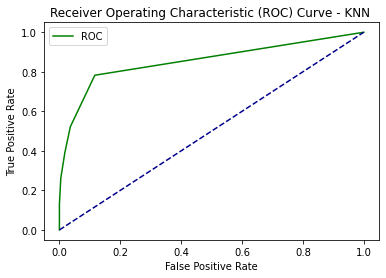

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Estimar probabilidades para o dataset test com base no algoritmo treinado.
probs = clf.predict_proba(X_test)

#Keep probabilities of the positive class only.
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

# Python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - KNN ')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 'yes')
plot_roc_curve(fpr, tpr)

#### E se considerarmos outro valor para K ? K = 9 

Here are some things to keep in mind:
As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

[[436   6]
 [ 19   9]]

Tabela Resumo de Perfomance do Algoritmo:
              precision    recall  f1-score   support

          no       0.96      0.99      0.97       442
         yes       0.60      0.32      0.42        28

    accuracy                           0.95       470
   macro avg       0.78      0.65      0.70       470
weighted avg       0.94      0.95      0.94       470

Precision :  60.0 %
Recall:  32.14 %
F-Score:  41.86 %


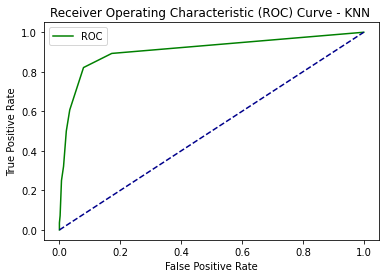

AUC Score: 0.91


In [36]:
from sklearn.neighbors import KNeighborsClassifier

KNN_df = df                               # Criar nova dataframe para o KNN
KNN_X = KNN_df.drop(['id', 'y'], axis=1)  # Features - todas menos o ID e a classe
KNN_y = KNN_df.y                          # Target variable


X_train, X_test, y_train, y_test = train_test_split(KNN_X, KNN_y, test_size=0.20) # Split Test do dataframe


clf = KNeighborsClassifier(n_neighbors=9) # Criar o algoritmo
clf.fit(X_train, y_train)                 # Treinar o algoritmo
y_pred = clf.predict(X_test)              # Fazer as previsões finais


print(confusion_matrix(y_test, y_pred))   # Printar a Confusion Matrix


print("\nTabela Resumo de Perfomance do Algoritmo:")
print(classification_report(y_test, y_pred))



# Calcular Precision, Recall e F-Score para confirmar:
precision = precision_score(y_test, y_pred, pos_label='yes').round(4)*100 # Nota é preciso indicar qual é a classe positiva
print("Precision : ", precision , "%" )
recall = recall_score(y_test, y_pred, pos_label='yes').round(4)*100  # Nota é preciso indicar qual é a classe positiva
print('Recall: ', recall, "%")
score = f1_score(y_test, y_pred, pos_label = 'yes').round(4)*100
print('F-Score: ',  score, '%')


#Estimar probabilidades para o dataset test com base no algoritmo treinado.
probs = clf.predict_proba(X_test)

#Keep probabilities of the positive class only.
probs = probs[:, 1]

# Plot ROC:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - KNN ')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 'yes')
plot_roc_curve(fpr, tpr)

# Calcular o AUC
auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

Nota : Apesar dos resultados satisfatórios o KNN vai beneficiar bastante do pré processamento dos dados, concretamente

Rescale Data: O KNN funciona muito melhor se todos os dados tiverem a mesma escala. Normalizar os dados para o intervalo [0, 1] é uma boa ideia, tratar outliers etc.

NA's: Dados ausentes significam que a distância entre as amostras não pode ser calculada. Essas amostras podem ser excluídas ou os valores ausentes podem ser imputados.

Dimensionalidade inferior: o KNN é adequado para dados dimensionais inferiores. O KNN irá então beneficiar da seleção de atributos reduzindo a dimensionalidade do Dataset.

## Naive Bayes

[[ 29 418]
 [  0  23]]

Tabela Resumo de Perfomance do Algoritmo:
              precision    recall  f1-score   support

          no       1.00      0.06      0.12       447
         yes       0.05      1.00      0.10        23

    accuracy                           0.11       470
   macro avg       0.53      0.53      0.11       470
weighted avg       0.95      0.11      0.12       470

Precision :  5.220000000000001 %
Recall:  100.0 %
F-Score:  9.91 %
AUC Score: 0.86


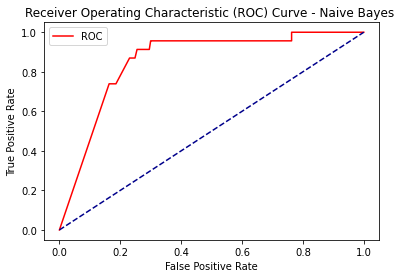

In [37]:
#Importar Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB


NB_df = df # Criar novo dataframe para o NB
NB_X = NB_df.drop(['id', 'y'], axis=1) # Features - todas menos o ID e a classe
NB_y = NB_df.y # Target variable

X_train, X_test, y_train, y_test = train_test_split(NB_X, NB_y, test_size=0.20) # Split Test do dataframe

clf = GaussianNB()           # Criar o algoritmo
clf.fit(X_train,y_train)     # Treinar o algoritmo
y_pred = clf.predict(X_test) # Fazer as previsões finais

print(confusion_matrix(y_test, y_pred)) # Printar Confusion Matrix
                       
print("\nTabela Resumo de Perfomance do Algoritmo:")
print(classification_report(y_test, y_pred))

# Calcular Precision, Recall e F-Score para confirmar:
precision = precision_score(y_test, y_pred, pos_label='yes').round(4)*100 # Nota é preciso indicar qual é a classe positiva
print("Precision : ", precision , "%" )
recall = recall_score(y_test, y_pred, pos_label='yes').round(4)*100  # Nota é preciso indicar qual é a classe positiva
print('Recall: ', recall, "%")
score = f1_score(y_test, y_pred, pos_label = 'yes').round(4)*100
print('F-Score: ',  score, '%')

#Estimar probabilidades para o dataset test com base no algoritmo treinado.
probs = clf.predict_proba(X_test)

#Manter apenas as probabilidades da classe positiva.
probs = probs[:, 1]

#Calcular o AUC
auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

# Plot da ROC
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes ')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 'yes')
plot_roc_curve(fpr, tpr)


# Próximos passos:
   ###  Pré-Processamento do Dataset 
   ###  Análise dos algoritmos mas sobre o Dataset tratado
   ###  Avaliar novos resultados 
   ###  Comparar os algoritmos e obter o melhor classificador
  

1. Data Cleaning:
The data can have many irrelevant and missing parts. To handle this part, data cleaning is done. It involves handling of missing data, noisy data etc.

(a). Missing Data:
This situation arises when some data is missing in the data. It can be handled in various ways.
Some of them are:
Ignore the tuples:
This approach is suitable only when the dataset we have is quite large and multiple values are missing within a tuple.
Fill the Missing values:
There are various ways to do this task. You can choose to fill the missing values manually, by attribute mean or the most probable value.
(b). Noisy Data:
Noisy data is a meaningless data that can’t be interpreted by machines.It can be generated due to faulty data collection, data entry errors etc. It can be handled in following ways :

Binning Method:
This method works on sorted data in order to smooth it. The whole data is divided into segments of equal size and then various methods are performed to complete the task. Each segmented is handled separately. One can replace all data in a segment by its mean or boundary values can be used to complete the task.
Regression:
Here data can be made smooth by fitting it to a regression function.The regression used may be linear (having one independent variable) or multiple (having multiple independent variables).
Clustering:
This approach groups the similar data in a cluster. The outliers may be undetected or it will fall outside the clusters.
2. Data Transformation:
This step is taken in order to transform the data in appropriate forms suitable for mining process. This involves following ways:

Normalization:
It is done in order to scale the data values in a specified range (-1.0 to 1.0 or 0.0 to 1.0)
Attribute Selection:
In this strategy, new attributes are constructed from the given set of attributes to help the mining process.
Discretization:
This is done to replace the raw values of numeric attribute by interval levels or conceptual levels.
Concept Hierarchy Generation:
Here attributes are converted from level to higher level in hierarchy. For Example-The attribute “city” can be converted to “country”.
3. Data Reduction:
Since data mining is a technique that is used to handle huge amount of data. While working with huge volume of data, analysis became harder in such cases. In order to get rid of this, we uses data reduction technique. It aims to increase the storage efficiency and reduce data storage and analysis costs.

The various steps to data reduction are:

Data Cube Aggregation:
Aggregation operation is applied to data for the construction of the data cube.
Attribute Subset Selection:
The highly relevant attributes should be used, rest all can be discarded. For performing attribute selection, one can use level of significance and p- value of the attribute.the attribute having p-value greater than significance level can be discarded.
Numerosity Reduction:
This enable to store the model of data instead of whole data, for example: Regression Models.
Dimensionality Reduction:
This reduce the size of data by encoding mechanisms.It can be lossy or lossless. If after reconstruction from compressed data, original data can be retrieved, such reduction are called lossless reduction else it is called lossy reduction. The two effective methods of dimensionality reduction are:Wavelet transforms and PCA (Principal Componenet Analysis).